# Verifying Stationarity of Log-Returns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Load 1-Day data

In [2]:
filepath = '/home/benjamin/Folders_Python/Portfolio/BTC/data/extract/outputBTCUSDT-2021-1-1-2025-11-24-1d.csv'

data = pd.read_csv(filepath, index_col='Open Time') 

In [3]:
data

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
Open Time,,,,,,,,,,,
2021-01-01,28923.63,29600.00,28624.57,29331.69,54182.925011,2021-01-01 23:59:59.999,1.582527e+09,1314910.0,27455.801725,8.022477e+08,0
2021-01-02,29331.70,33300.00,28946.53,32178.33,129993.873362,2021-01-02 23:59:59.999,4.073842e+09,2245922.0,67446.305246,2.110335e+09,0
2021-01-03,32176.45,34778.11,31962.99,33000.05,120957.566750,2021-01-03 23:59:59.999,4.057598e+09,2369698.0,59750.332871,2.004428e+09,0
2021-01-04,33000.05,33600.00,28130.00,31988.71,140899.885690,2021-01-04 23:59:59.999,4.429010e+09,2642408.0,69088.469230,2.173435e+09,0
2021-01-05,31989.75,34360.00,29900.00,33949.53,116049.997038,2021-01-05 23:59:59.999,3.743617e+09,2526851.0,59691.754755,1.927195e+09,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-20,91554.96,93160.00,86100.00,86637.23,39733.190730,2025-11-20 23:59:59.999,3.548950e+09,7841395.0,18283.840470,1.634256e+09,0
2025-11-21,86637.22,87498.94,80600.00,85129.43,72256.126790,2025-11-21 23:59:59.999,6.061349e+09,11826480.0,34071.858280,2.859133e+09,0
2025-11-22,85129.42,85620.00,83500.00,84739.74,14193.932630,2025-11-22 23:59:59.999,1.197657e+09,4697593.0,6688.794280,5.645621e+08,0


Transform data and verify that the log-returns are stationary

In [4]:
cols = ['Open', 'High', 'Low', 'Close']
for c in cols:
    data['log_' + c] = np.log(data[c])
    data['diff_log_' + c] = data['log_'+c].diff()
    
data.dropna(inplace=True)

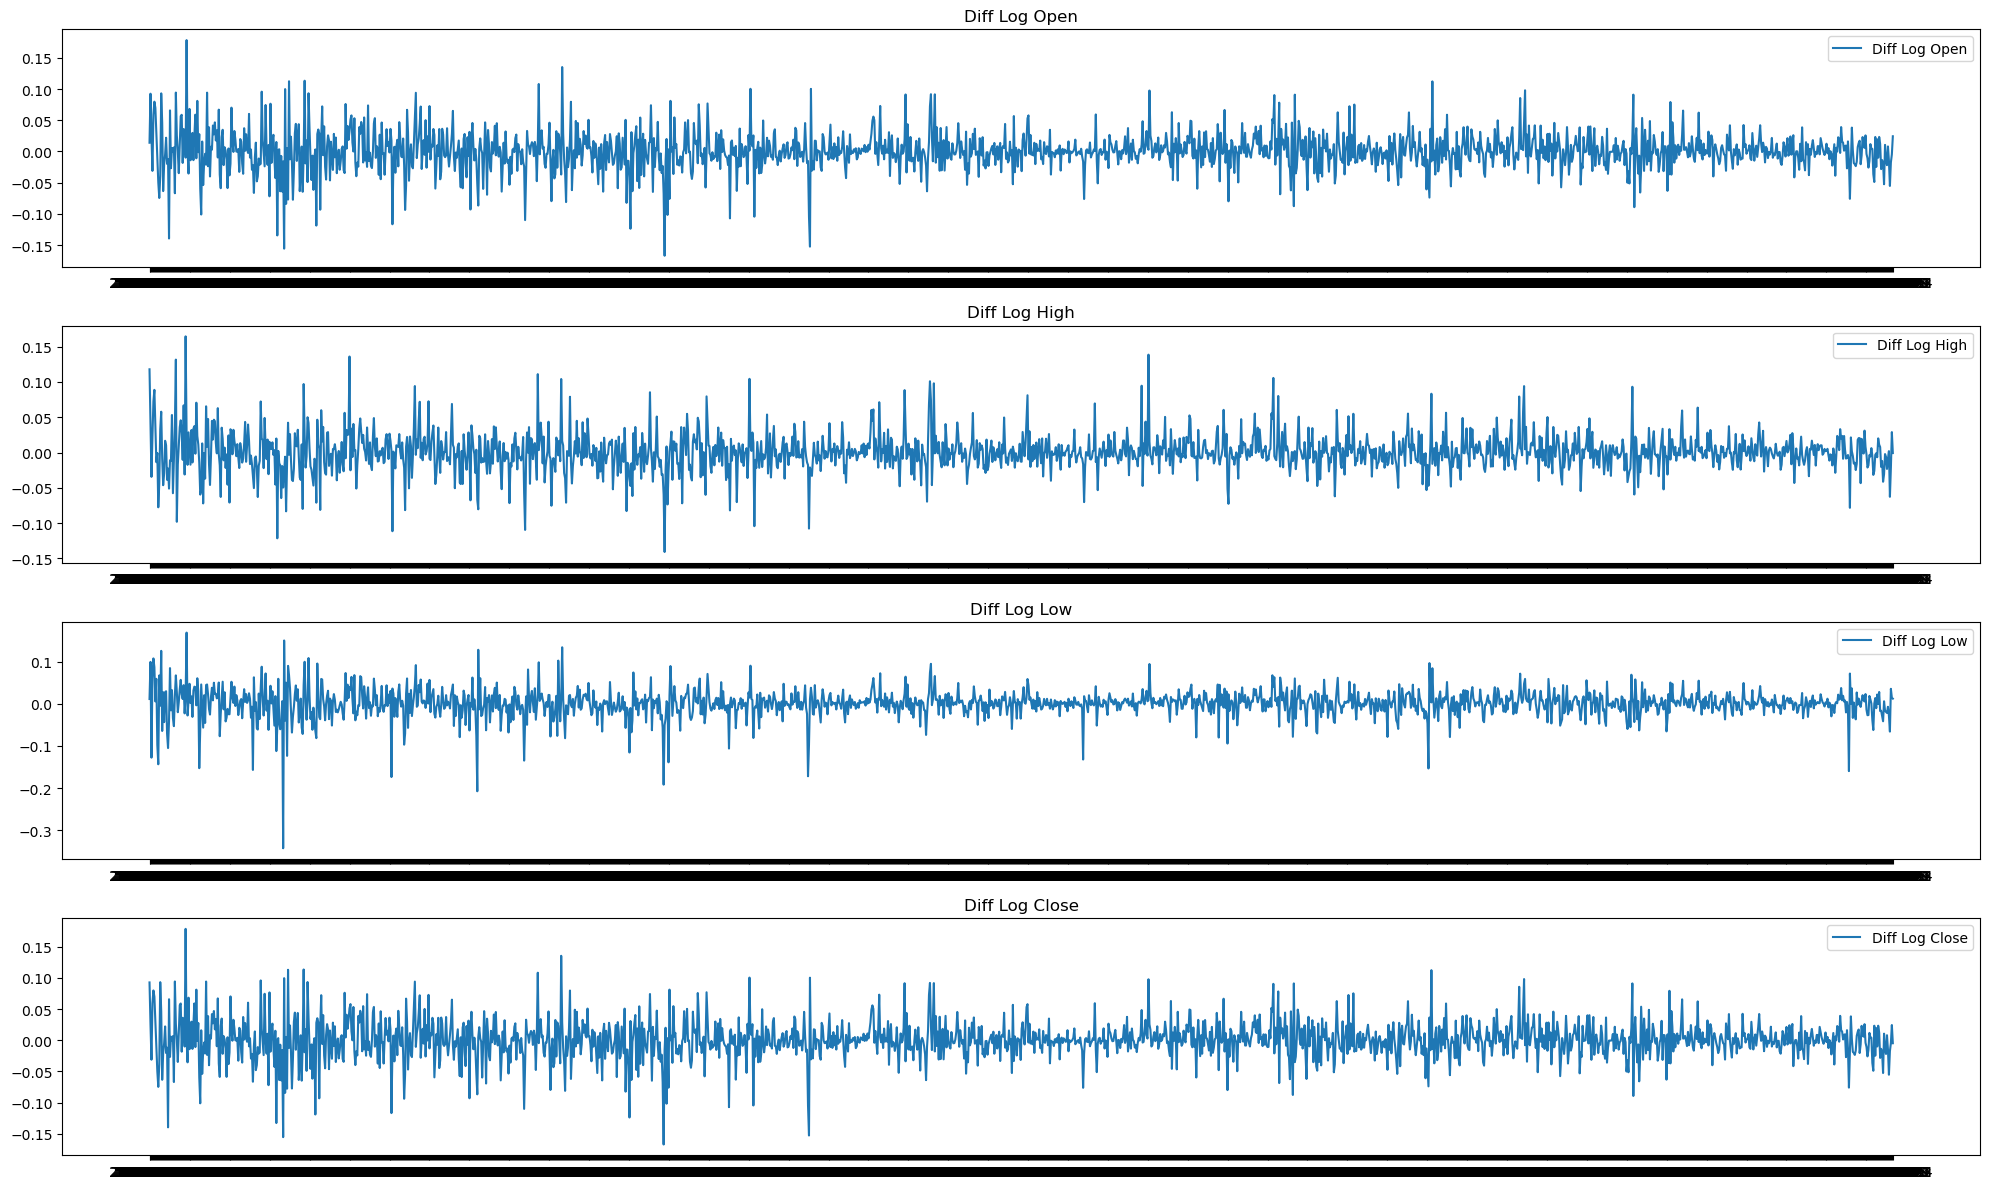

In [5]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 12))

for i, c in enumerate(cols):
    ax[i].plot(data.index, data['diff_log_' + c], label='Diff Log ' + c)
    ax[i].set_title('Diff Log ' + c)
    ax[i].legend()
    # ax[i].grid()
plt.tight_layout()
plt.show()

Run ADF Tests

In [6]:
for c in cols:
    print(f'Augmented Dickey-Fuller Test for diff_log_{c}:')
    adf_stat, pvalue, usedlag, nobs, crit_vals, icbest = adfuller(data['diff_log_'+c], maxlag=None, regression='c', autolag='BIC')

    print(f'ADF Statistic: {adf_stat:.3e}')
    print(f'p-value: {pvalue:.3e}')
    print(f'Used lag: {usedlag:d}')
    print(f'Number of obs: {nobs:d}')
    print(f'Critical Values: {crit_vals}')
    if icbest is not None:
        print(f'ICbest: : {icbest:.3e}')
    print()

Augmented Dickey-Fuller Test for diff_log_Open:
ADF Statistic: -4.386e+01
p-value: 0.000e+00
Used lag: 0
Number of obs: 1787
Critical Values: {'1%': np.float64(-3.4340146436883665), '5%': np.float64(-2.8631587363584567), '10%': np.float64(-2.5676317637986714)}
ICbest: : -7.303e+03

Augmented Dickey-Fuller Test for diff_log_High:
ADF Statistic: -3.799e+01
p-value: 0.000e+00
Used lag: 0
Number of obs: 1787
Critical Values: {'1%': np.float64(-3.4340146436883665), '5%': np.float64(-2.8631587363584567), '10%': np.float64(-2.5676317637986714)}
ICbest: : -7.813e+03

Augmented Dickey-Fuller Test for diff_log_Low:
ADF Statistic: -4.174e+01
p-value: 0.000e+00
Used lag: 0
Number of obs: 1787
Critical Values: {'1%': np.float64(-3.4340146436883665), '5%': np.float64(-2.8631587363584567), '10%': np.float64(-2.5676317637986714)}
ICbest: : -7.140e+03

Augmented Dickey-Fuller Test for diff_log_Close:
ADF Statistic: -4.401e+01
p-value: 0.000e+00
Used lag: 0
Number of obs: 1787
Critical Values: {'1%': np

Load 1-hour data

In [7]:
filepath = '/home/benjamin/Folders_Python/Portfolio/BTC/data/extract/outputBTCUSDT-2021-1-1-2025-11-24-1h.csv'

data = pd.read_csv(filepath, index_col='Open Time') 

In [8]:
cols = ['Open', 'High', 'Low', 'Close']
for c in cols:
    data['log_' + c] = np.log(data[c])
    data['diff_log_' + c] = data['log_'+c].diff()
    
data.dropna(inplace=True)

In [9]:
# DISPLAY takes a long time

# fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 12))

# for i, c in enumerate(cols):
#     ax[i].plot(data.index, data['diff_log_' + c], label='Diff Log ' + c)
#     ax[i].set_title('Diff Log ' + c)
#     ax[i].legend()
#     # ax[i].grid()
# plt.tight_layout()
# plt.show()

In [10]:
for c in cols:
    print(f'Augmented Dickey-Fuller Test for diff_log_{c}:')
    adf_stat, pvalue, usedlag, nobs, crit_vals, icbest = adfuller(data['diff_log_'+c], maxlag=None, regression='c', autolag='BIC')

    print(f'ADF Statistic: {adf_stat:.3e}')
    print(f'p-value: {pvalue:.3e}')
    print(f'Used lag: {usedlag:d}')
    print(f'Number of obs: {nobs:d}')
    print(f'Critical Values: {crit_vals}')
    if icbest is not None:
        print(f'ICbest: : {icbest:.3e}')
    print()

Augmented Dickey-Fuller Test for diff_log_Open:
ADF Statistic: -2.085e+02
p-value: 0.000e+00
Used lag: 0
Number of obs: 42910
Critical Values: {'1%': np.float64(-3.4305024048295034), '5%': np.float64(-2.861607359559389), '10%': np.float64(-2.5668058533083804)}
ICbest: : -3.109e+05

Augmented Dickey-Fuller Test for diff_log_High:
ADF Statistic: -1.425e+02
p-value: 0.000e+00
Used lag: 1
Number of obs: 42909
Critical Values: {'1%': np.float64(-3.430502408381531), '5%': np.float64(-2.8616073611292663), '10%': np.float64(-2.5668058541439818)}
ICbest: : -3.202e+05

Augmented Dickey-Fuller Test for diff_log_Low:
ADF Statistic: -1.094e+02
p-value: 0.000e+00
Used lag: 3
Number of obs: 42907
Critical Values: {'1%': np.float64(-3.4305024154860826), '5%': np.float64(-2.8616073642692403), '10%': np.float64(-2.566805855815302)}
ICbest: : -3.069e+05

Augmented Dickey-Fuller Test for diff_log_Close:
ADF Statistic: -2.085e+02
p-value: 0.000e+00
Used lag: 0
Number of obs: 42910
Critical Values: {'1%': n

Load 5-minute data

In [11]:
filepath = '/home/benjamin/Folders_Python/Portfolio/BTC/data/extract/outputBTCUSDT-2021-1-1-2025-11-24-5m.csv'

data = pd.read_csv(filepath, index_col='Open Time') 

In [12]:
cols = ['Open', 'High', 'Low', 'Close']
for c in cols:
    data['log_' + c] = np.log(data[c])
    data['diff_log_' + c] = data['log_'+c].diff()
    
data.dropna(inplace=True)

In [13]:
for c in cols:
    print(f'Augmented Dickey-Fuller Test for diff_log_{c}:')
    adf_stat, pvalue, usedlag, nobs, crit_vals, icbest = adfuller(data['diff_log_'+c], maxlag=None, regression='c', autolag='BIC')

    print(f'ADF Statistic: {adf_stat:.3e}')
    print(f'p-value: {pvalue:.3e}')
    print(f'Used lag: {usedlag:d}')
    print(f'Number of obs: {nobs:d}')
    print(f'Critical Values: {crit_vals}')
    if icbest is not None:
        print(f'ICbest: : {icbest:.3e}')
    print()

Augmented Dickey-Fuller Test for diff_log_Open:
ADF Statistic: -2.784e+02
p-value: 0.000e+00
Used lag: 6
Number of obs: 514888
Critical Values: {'1%': np.float64(-3.430362700495256), '5%': np.float64(-2.861545613469771), '10%': np.float64(-2.566772987844843)}
ICbest: : -4.943e+06

Augmented Dickey-Fuller Test for diff_log_High:
ADF Statistic: -8.138e+01
p-value: 0.000e+00
Used lag: 78
Number of obs: 514816
Critical Values: {'1%': np.float64(-3.430362702271503), '5%': np.float64(-2.861545614254849), '10%': np.float64(-2.566772988262712)}
ICbest: : -5.078e+06

Augmented Dickey-Fuller Test for diff_log_Low:
ADF Statistic: -2.057e+02
p-value: 0.000e+00
Used lag: 12
Number of obs: 514882
Critical Values: {'1%': np.float64(-3.4303627006432578), '5%': np.float64(-2.8615456135351858), '10%': np.float64(-2.566772987879661)}
ICbest: : -5.003e+06

Augmented Dickey-Fuller Test for diff_log_Close:
ADF Statistic: -2.784e+02
p-value: 0.000e+00
Used lag: 6
Number of obs: 514888
Critical Values: {'1%':